![Titulo](Imagenes/Logo.png)
# Uso de Python, Numpy y Sympy en la Docencia del Método de los Elementos Finitos

## Presentación

En los últimos años he sido profesor de la materia de Elementos Finitos. 
Esta charla supone ser una recopilación de experiencias y lecciones aprendidas 
en el uso de Python y las librerías NumPy y SymPy en este curso. Consdiero que 
lo aprendido puede servir para la utilización de estas librerías en otros temas.

Vale la pena decir que el utilizar estas liberías para enseñar el MEF es un reto
doble, pues hay algunos estudiantes que no tienen mucha experiencia programando 
(aunque todos han tomado cursos usando Python). Sin embargo, la aplicación actual 
y eficiente del MEF implica necesariamente el uso de software.

## Introducción al Método de los Elementos Finitos

El MEF es un método numérico que nos permite obtener una solución aproximada 
a una ecuación diferencial. Por ejemplo:

$$-K \frac {d^2 T} {dx^2} = Q $$

Ecuación de transferencia de calor en sólidos (conducción). 

Terminología y significado de las variables utilizadas:

* $x$ y $y$ forman el sistema de coordenadas donde está definido el problema.
* $L$ es la longitud de la barra (es decir, el **dominio** está definido de $x=0$ a $x=L$)
* $T(x)$ es la **temperatura** de la barra. Su valor para cada parte del dominio es lo que queremos obtener.
* $Q$ representa la **generación** de calor en la barra. Normalmente asociado a una unidad de volumen.
* $K$ es la **constante de conductividad térmica**$^*$. Es una relación de cuanto se puede mover el calor (energía) dada una diferencia de temperatura. Su valor siempre es negativo, indicando que el calor siempre se mueve del punto más caliente a uno más frío.

$^*$ No en todos los materiales/condiciones $K$ es constante. Se estudia este caso inicialmente para poder obtener una solución de manera sencilla.

![Fig1](Imagenes/Fig1.png)

__Condiciones de frontera__:

Para poder conocer la solución de este sistema, es necesario saber que ocurre
en los límites del dominio (en la frontera):

$$ \frac {d} {dx} T(x)\Big{|}_{x=0} = - \frac {q} {K} $$

$$T(x)\Big{|}_{x=L} = T_L$$

Terminología y significado de las variables utilizadas:

* $q$ representa un **flujo con valor establecido** en la **frontera** de la barra ($x=0$), dato conocido.
* $T_L$ representa __la temperatura__ en $x=L$, dato conocido.

$^*$ No en todos los materiales/condiciones $K$ es constante. Se estudia este caso inicialmente para poder obtener una solución de manera sencilla.

El MEF inicia por __proponer__ una solución, del tipo:

$$T(x) \approx T_1 N_1 (x) + T_2 N_2 (x) + ... + T_{n+1} N_{n+1} (x) $$

$$T(x) \approx \sum_{i=0}^{n+1} T_i N_i (x) $$

Normalmente esto __no nos va permitir obtener una solución exacta__, por lo que tendremos que en nuestra ecuación diferencial original:

$$-K \frac {d^2 T} {dx^2} - Q \neq 0$$

Tendremos una diferencia o __residual__ ($R(T, x)$):

$$R(T, x) = -K \frac {d^2 T} {dx^2} - Q $$

Como T no es la solución exacta, no podemos forzar el residual a desaparecer en todo punto $x$, sin importar que tan pequeña hagamos la malla. La idea de los _residuos ponderados_ es que podemos multiplicar los residuos por una "ponderación" (o peso) y forzar la ecuación a volverse cero. Es decir:

$$\int_0^L W(x)R(T, x)dx=0$$

Donde $W(x)$ es una función de ponderación. Seleccionando funciones para $W(x)$ reemplazando las en esta ecuación podemos generar varios sistemas de ecuaciones dependientes de los parámetros $a_i$ que van a determinar una aproximación $T$ en la forma de sumas finitas. Esta solución va a satisfacer la ecuación diferencial en "promedio" o como una "integral". 

El tipo de función seleccionada para $W(x)$, depende del tipo de técnica de residuales seleccionado. En el procedimiento de Galerkin, los pesos son establecidos como la misma función de peso $N(x)$, de tal manera que:

$$W_i(x)=N_i(x)$$

y


$$\int_0^L N(x)R(T, x)dx=0$$

Substituyendo el residual:


$$\int_0^L N(x)\left[ -K \frac {d^2 T} {dx^2} - Q \right]dx=0$$

![Fig2](Imagenes/Fig2.png)

Usar funciones lineales para $N_i(x)$ parece una buena idea.. pero las funciones lineales:

$$\frac {d^2 N_i(x)T_i} {dx^2} = 0$$

Para poder resolver esta dificultad utilizamos la integración por partes para el primer termino de la suma, usando:

$$ \int u \cdot dv = u \cdot v - \int v \cdot du $$

$$ u = N(x) $$

$$ dv = \frac {d^2 T} {dx^2} $$

$$\int_0^L N(x)\left[ -K \frac {d^2 T} {dx^2}  \right]dx= - KN \dfrac {dT}{dx}\Big|_0^L + \int_0^L K \frac {dN}{dx} \frac{dT}{dx} dx $$

De manera que la ecuación queda:

$$\int_0^L K \frac {dN}{dx} \frac{dT}{dx} dx -\int_0^L N(x)Q dx - KN\dfrac {dT}{dx}\Big|_0^L = 0$$

Esto se conoce como la formulación _"débil"_ (_"weak"_ formulation) ya que la necesidad de la existencia de la segunda derivada se a "relajado": ya no es necesario que exista, ni que esté definida en todos los puntos.

Las $N_i$, usando funciones lineales, quedaría algo así:

![Fig3](Imagenes/Fig3.png)

El MEF aprovecha esta estructura __realizando la integración por elemento__ siendo que las funciones están definidas para cada elemento y las funciones solo interactuan dentro de los cada elemento:

$$\sum_{j=1}^{n+1}\left[\int_0^{h^{(e)}} K \frac {dN_i}{dx} \frac{dN_j}{dx}T_j dx -\int_0^{h^{(e)}} N_i Q dx - KN_i \dfrac {dT}{dx}\Big|_{x_i}^{x_{i+1}} = 0\right]$$

Donde $h^{(e)}$ es el tamaño del elemento y $i = 1, 2, ..., n+1$. 

Es común __modificar los límites de integración__ para no tener que definir las funciones de forma para cada elemento, siendo útiles definiciones como:

$$N_1^{(e)} = 1-\frac {x} {{h^{(e)}}}$$

$$N_2^{(e)} = \frac {x} {{h^{(e)}}}$$

Esto permite que el comportamiento de los diferentes elementos se "sumen" en el proceso que se conoce como __ensamble__ de la matriz del sistema.

## Uso de SymPy

> SymPy es una biblioteca de Python para matemáticas simbólicas. 
> Su propósito es llegar a ser un sistema de álgebra por computadora (CAS) 
> completo manteniendo el código tan simple como sea posible para poder ser 
> legible y extensible de manera fácil. SymPy está escrito en Python enteramente. 
>
> -- <cite>https://www.sympy.org/en/index.html</cite>

¿Cómo me puede ayudar para obtener esta integral?

$$\int_0^{h_e} K \frac {dN_i}{dx} \frac{dN_j}{dx} dx$$

In [1]:
# Aquí vamos!!
import sympy as sp

__SymPy__ se apoya en varias librerías para dar la mejor presentación. Si __miketex__ (disponible en anaconda) está instalado permite una representación basada en __LaTeX__ (https://www.latex-project.org/). Esta representación está disponible automáticamente en Jupyter, pero para poder aprovechar esta representación en otros sitemas (por ejemplo Spyder) es necesario importar:

In [2]:
from IPython.display import display as pp # pretty print

![Spyder](Imagenes/Spyder.png)

El primer paso es declarar los simbolos que utilizaremos. SymPy reconoce automáticamente la escritura de simbolos de LaTeX:

In [3]:
x = sp.Symbol('x')
he = sp.Symbol('h^{(e)}')
pp(x, he)

x

h^{(e)}

__PARENTESIS__: Esto presenta lo que para mi es la __primera dificultad__ para explicar el uso de SymPy:
* Los estudiantes deben de entender que lo que está a la __derecha__ es un símbolo algebraico, mientras que lo que está a la __izquierda__ es una variable de Python.

In [4]:
y = x ** 3 # Doble asterisco (**) es utilizado como potencia, x**3 = x³
pp(y)

x**3

![Fig3](Imagenes/TutSympy.png)

(en realidad, las dos son __objetos__ de sympy...)

* Nada nos impide hacer cosas que pudieran no tener mucho sentido:

In [5]:
a = sp.Symbol('b')
b = sp.Symbol('a')
pp(a,b)

b

a

Por lo que esta diferenciación es básica y debe quedar clara para que la utilización de la librería sea posible. 

__FIN PARENTESIS__

Declaramos las funciones de forma:

In [6]:
N1 = 1-x/he

N2 = x/he

pp(N1, N2)

1 - x/h^{(e)}

x/h^{(e)}

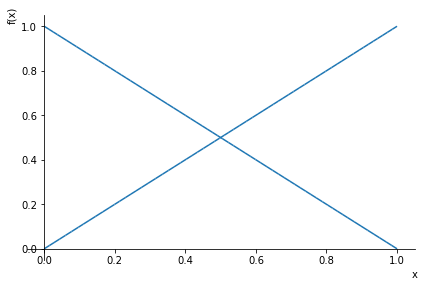

In [7]:
p1 = sp.plotting.plot(N1.subs(he,1), N2.subs(he,1), (x, 0, 1))

Las acomodamos en un vector:

In [8]:
N = sp.Matrix([N1, N2])
pp(N)

Matrix([
[1 - x/h^{(e)}],
[    x/h^{(e)}]])

Las derivamos usando:

$\frac {d} {dx} F$ -> `sp.diff(F, x)`

In [9]:
dN = sp.diff(N, x)
pp(dN)

Matrix([
[-1/h^{(e)}],
[ 1/h^{(e)}]])

La expresión:
$$\int_0^{h^{(e)}} K \frac {dN_i}{dx} \frac{dN_j}{dx} dx$$
quedaría:
$$ \int_0^{h^{(e)}} K \left[ \frac {d}{dx}N \right] ^T \left[ \frac {d}{dx}N \right] dx $$

Integramos usando:

$\int_a^b F dx$ -> `sp.integrate(F, (x,a,b))`

In [10]:
K = sp.Symbol('K')

MatrizK = sp.integrate(K*dN*dN.T, (x,0,he))
pp(MatrizK)

Matrix([
[ K/h^{(e)}, -K/h^{(e)}],
[-K/h^{(e)},  K/h^{(e)}]])

Que coincide con la expresión que se encuentra en la bibliografia:


$$ \frac {K} {h^{(e)}} \begin{bmatrix} 1 & -1 \\ -1 & 1 \end{bmatrix}$$

Esta solución puede parecer simple o poco interesante, pero la aplicación a funciones de forma cuadráticas empieza a demostrar su utilidad:

In [11]:
N1 = 1 - 3*x/he + 2*x**2/he**2
N2 = 4*x/he - 4*x**2/he**2
N3 = -1*x/he + 2*x**2/he**2

pp(N1, N2, N3)

1 - 3*x/h^{(e)} + 2*x**2/h^{(e)}**2

4*x/h^{(e)} - 4*x**2/h^{(e)}**2

-x/h^{(e)} + 2*x**2/h^{(e)}**2

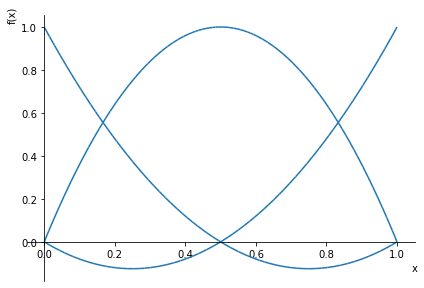

In [12]:
p1 = sp.plotting.plot(N1.subs(he,1), N2.subs(he,1), N3.subs(he,1), (x, 0, 1))

In [13]:
N = sp.Matrix([N1, N2, N3])
pp(N)

Matrix([
[1 - 3*x/h^{(e)} + 2*x**2/h^{(e)}**2],
[    4*x/h^{(e)} - 4*x**2/h^{(e)}**2],
[     -x/h^{(e)} + 2*x**2/h^{(e)}**2]])

In [14]:
dN = sp.diff(N, x)
pp(dN)

Matrix([
[-3/h^{(e)} + 4*x/h^{(e)}**2],
[ 4/h^{(e)} - 8*x/h^{(e)}**2],
[-1/h^{(e)} + 4*x/h^{(e)}**2]])

Nuevamente, la expresión:
$$ \int_0^{h^{(e)}} K \left[ \frac {d}{dx}N \right] ^T \left[ \frac {d}{dx}N \right] dx $$

In [15]:
MatrizK = sp.integrate(K*dN*dN.T, (x,0,he))
pp(MatrizK)

Matrix([
[ 7*K/(3*h^{(e)}), -8*K/(3*h^{(e)}),    K/(3*h^{(e)})],
[-8*K/(3*h^{(e)}), 16*K/(3*h^{(e)}), -8*K/(3*h^{(e)})],
[   K/(3*h^{(e)}), -8*K/(3*h^{(e)}),  7*K/(3*h^{(e)})]])

La integral que contiene los términos de generación $Q$:

$$\int_0^{h^{(e)}} N_i Q dx $$

In [16]:
Q = sp.Symbol('Q')

VectorQ = sp.integrate(N*Q, (x,0,he))
pp(VectorQ)

Matrix([
[  Q*h^{(e)}/6],
[2*Q*h^{(e)}/3],
[  Q*h^{(e)}/6]])

La última parte representa, en realidad, el flujo en la frontera del elemento:

$$KN_i \dfrac {dT}{dx}\Big|_{x_i}^{x_{i+1}} = \begin{bmatrix}  K \dfrac {dT}{dx}\Big|_{x_i} \\ K \dfrac {dT}{dx}\Big|_{x_{i+1}}  \end{bmatrix}$$

Por lo que, para este problema, quedaría:

In [17]:
q1 = sp.Symbol('q_1')
q3 = sp.Symbol('q_3')

Vectorq = sp.Matrix([q1,0,q3])
pp(Vectorq)

Matrix([
[q_1],
[  0],
[q_3]])

Así, la expresión integral, usando elementos cuadráticos se convierte en:

$$\begin{bmatrix}\frac{7 K}{3 h^{(e)}} & - \frac{8 K}{3 h^{(e)}} & \frac{K}{3 h^{(e)}}\\- \frac{8 K}{3 h^{(e)}} & \frac{16 K}{3 h^{(e)}} & - \frac{8 K}{3 h^{(e)}}\\\frac{K}{3 h^{(e)}} & - \frac{8 K}{3 h^{(e)}} & \frac{7 K}{3 h^{(e)}}\end{bmatrix}\begin{bmatrix}T_1 \\ T_2 \\ T_3\end{bmatrix} = \begin{bmatrix}\frac{Q h^{(e)}}{6} \\ \frac{2 Q h^{(e)}}{3}\\\frac{Q h^{(e)}}{6}\end{bmatrix} + \begin{bmatrix}q \\ 0\\0\end{bmatrix}$$

Declaramos las incognitas como simbolos:

In [18]:
T1, T2, T3 = sp.symbols('T_1, T_2, T_3')
T = sp.Matrix([T1, T2, T3])

In [19]:
sistema = MatrizK * T - VectorQ - Vectorq
pp(sistema)

Matrix([
[7*K*T_1/(3*h^{(e)}) - 8*K*T_2/(3*h^{(e)}) + K*T_3/(3*h^{(e)}) - Q*h^{(e)}/6 - q_1],
[-8*K*T_1/(3*h^{(e)}) + 16*K*T_2/(3*h^{(e)}) - 8*K*T_3/(3*h^{(e)}) - 2*Q*h^{(e)}/3],
[K*T_1/(3*h^{(e)}) - 8*K*T_2/(3*h^{(e)}) + 7*K*T_3/(3*h^{(e)}) - Q*h^{(e)}/6 - q_3]])

Substituimos los valores para este caso en particular:

In [20]:
L, TL = sp.symbols('L, T_L')

sistema = sistema.subs(he, L).subs(T3,TL)
pp(sistema)

Matrix([
[7*K*T_1/(3*L) - 8*K*T_2/(3*L) + K*T_L/(3*L) - L*Q/6 - q_1],
[-8*K*T_1/(3*L) + 16*K*T_2/(3*L) - 8*K*T_L/(3*L) - 2*L*Q/3],
[K*T_1/(3*L) - 8*K*T_2/(3*L) + 7*K*T_L/(3*L) - L*Q/6 - q_3]])

Y resolvemos algebraicamente:

In [21]:
solucion = sp.solve(sistema, (T1,T2,q3))
pp(solucion)

{T_1: (2*K*T_L + L**2*Q + 2*L*q_1)/(2*K),
 T_2: (8*K*T_L + 3*L**2*Q + 4*L*q_1)/(8*K),
 q_3: -L*Q - q_1}

In [22]:
pp(solucion[T1],solucion[T2],solucion[q3])

(2*K*T_L + L**2*Q + 2*L*q_1)/(2*K)

(8*K*T_L + 3*L**2*Q + 4*L*q_1)/(8*K)

-L*Q - q_1

La solución analítica de este problema es:

$$ T(x) = T_L + \frac {Q}{2K} (L^2 - x^2) + \frac {q_1}{K}(L-x) $$

In [23]:
solucion_analitica = TL + Q/(2*K) *(L**2 - x**2) + q1/K*(L-x)
pp(solucion_analitica)

T_L + Q*(L**2 - x**2)/(2*K) + q_1*(L - x)/K

Substituyendo $x=0$ y $x=L/2$:

In [24]:
solucion_analitica.subs(x,0)

T_L + L**2*Q/(2*K) + L*q_1/K

In [25]:
solucion_analitica.subs(x,L/2)

T_L + 3*L**2*Q/(8*K) + L*q_1/(2*K)

In [26]:
pp(solucion[T1],solucion[T2])

(2*K*T_L + L**2*Q + 2*L*q_1)/(2*K)

(8*K*T_L + 3*L**2*Q + 4*L*q_1)/(8*K)

## Uso de NumPy:

> NumPy is the fundamental package for scientific computing in Python. 
> It is a Python library that provides a multidimensional array object, 
> various derived objects (such as masked arrays and matrices), and an 
> assortment of routines for fast operations on arrays, including 
> mathematical, logical, shape manipulation, sorting, selecting, 
> I/O, discrete Fourier transforms, basic linear algebra, basic 
> statistical operations, random simulation and much more..
>
> -- <cite>https://numpy.org/doc/stable/user/whatisnumpy.html</cite>

In [27]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

__NumPy__ es la librería ideal para resolver los problemas de forma numérica, es decir, para usar el MEF con todo su potencial. Sin embargo su utilización también presenta algunos retos para los alumnos que no son expertos en programación. 

Resolveremos, a manera de ejmplo, el ejercicio anterior, pero ahora utilizando elementos triangulares (dominio 2D, plano) con los siguientes datos:

In [28]:
L = 3 # m
k = 50 # W/m°C
q = 25 # W/m²
Q = 40 # W/m³
TL = 300 # °C

Substituyendo estos valores en la solución anterior se obtiene:

$$T_1 = 305.10 \,^oC$$
$$T_2 = 303.45 \,^oC$$
$$T_3 = T_L = 300.00 \,^oC$$

Al no exigirles el uso de una herramienta en específico los alumnos, usando una
hoja de cálculo, hacen esto:
![hoja](Imagenes/HojaCalculo.png)

__Eureka__: tenemos un diccionario. 

La propuesta es, entonces, trabajar con una
__lista de diccionarios__, donde cada diccionario es un elemento.

In [29]:
elementos = []
elementos.append({'x': np.array([0. , 0. , L/2]),
                  'y': np.array([0. , L/2, 0. ]),
                  'n': [0, 3, 1]})
elementos.append({'x': np.array([0. , L/2, L/2]),
                  'y': np.array([L/2, L/2, 0. ]),
                  'n': [3, 4, 1]})
elementos.append({'x': np.array([L/2, L/2, L  ]),
                  'y': np.array([0. , L/2, 0. ]),
                  'n': [1, 4, 2]})
elementos.append({'x': np.array([L/2, L  , L  ]),
                  'y': np.array([L/2, L/2, 0. ]),
                  'n': [4, 5, 2]})
elementos.append({'x': np.array([0. , 0. , L/2]),
                  'y': np.array([L/2, L  , L  ]),
                  'n': [3, 6, 7]})
elementos.append({'x': np.array([0. , L/2, L/2]),
                  'y': np.array([L/2, L  , L/2]),
                  'n': [3, 7, 4]})
elementos.append({'x': np.array([L/2, L/2, L  ]),
                  'y': np.array([L/2, L  , L  ]),
                  'n': [4, 7, 8]})
elementos.append({'x': np.array([L/2, L  , L  ]),
                  'y': np.array([L/2, L  , L/2]),
                  'n': [4, 8, 5]})

Una representación gráfica ayuda para entender mejor lo anterior:

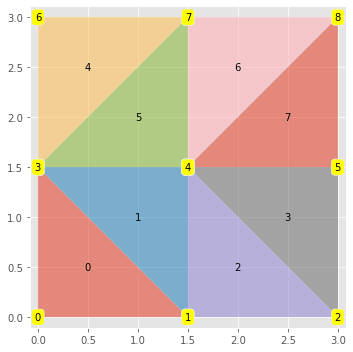

In [30]:
plt.figure(figsize=(5,5))
for i, e in enumerate(elementos):
    plt.fill(e['x'],e['y'], alpha=0.6)
    x = np.array(e['x']).mean()
    y = np.array(e['y']).mean()
    plt.text(x,y,i, ha='center', va='center')
    for x, y, n in zip(e['x'],e['y'],e['n']):
         plt.text(x,y,"{}".format(n), va='center', ha='center', bbox= dict(boxstyle='round', facecolor='yellow'))
plt.axis('equal')
plt.tight_layout()
plt.show()

Con un ciclo for, podemos ir actualizando y los diccionarios. Por ejemplo, para 
la matriz $\mathbf{K}$ , hacemos:

$$\mathbf{K} = \left[ k_{ij} \right] = \left[ \int\limits_{\Omega} K \left( \dfrac {\partial N_i} {\partial x} \dfrac {\partial N_j} {\partial x} + \dfrac {\partial N_i} {\partial y} \dfrac {\partial N_j} {\partial y}\right) d\Omega \right]$$

No entraré en detalle, pero de esta integración se obtiene:

$$\mathbf{K}^{(e)}= \dfrac {K} {4 A^{(e)}} \begin{bmatrix} b_1b_1+c_1c_1 & b_1b_2+c_1c_2 & b_1b_3+c_1c_3 \\ b_2b_1+c_2c_1 & b_2b_2+c_2c_2 & b_2b_3+c_2c_3 \\ b_3b_1+c_3c_1 & b_3b_2+c_3c_2 & b_3b_3+c_3c_3 \end{bmatrix}$$

Donde:

|$i$|$b_i$|$c_i$|
|:---:|:-----:|:-----:|
|$1$|$y_2-y_3$|$x_3-x_2$|
|$2$|$y_3-y_1$|$x_1-x_3$|
|$3$|$y_1-y_2$|$x_2-x_1$|

In [31]:
A = (L/2)**2/2 # m^2 , todos los elementos son iguales 

for e in elementos:
    e.update(A=A)
    e.update(b1=e['y'][1]-e['y'][2])
    e.update(c1=e['x'][2]-e['x'][1])
    e.update(b2=e['y'][2]-e['y'][0])
    e.update(c2=e['x'][0]-e['x'][2])
    e.update(b3=e['y'][0]-e['y'][1])
    e.update(c3=e['x'][1]-e['x'][0])
    
elementos[0]

{'x': array([0. , 0. , 1.5]),
 'y': array([0. , 1.5, 0. ]),
 'n': [0, 3, 1],
 'A': 1.125,
 'b1': 1.5,
 'c1': 1.5,
 'b2': 0.0,
 'c2': -1.5,
 'b3': -1.5,
 'c3': 0.0}

In [32]:
for e in elementos:
    K_e = np.zeros((3,3))
    for i in range(0,3):
        for j in range(0,3):
            K_e[i,j] = e['b{}'.format(i+1)]*e['b{}'.format(j+1)]+e['c{}'.format(i+1)]*e['c{}'.format(j+1)]
    K_e = k / 4 / e['A'] * K_e
    e.update({'K':K_e})

pp(sp.Matrix(K_e)) 

Matrix([
[ 25.0,   0.0, -25.0],
[  0.0,  25.0, -25.0],
[-25.0, -25.0,  50.0]])

El término de generación $\mathbf{Q}$ se integra al diccionario usando:

In [33]:
for e in elementos:
    F_e = Q*e['A']/3 * np.array([1,1,1])
    e.update({'F':F_e})

pp(sp.Matrix(F_e))

Matrix([
[15.0],
[15.0],
[15.0]])

Y, el flujo conocido se integra con el siguiente vector:

In [34]:
F1 = q * (L / 2) / 2 * np.array([1,1,0])

for i, e in enumerate(elementos):
    if i in (0,4):
        e['F'] = e['F'] + F1

pp(sp.Matrix(F1))

Matrix([
[18.75],
[18.75],
[  0.0]])

El ensambe de matrices se puede hacer con un doble ciclo for (columnas y renglones de la matriz de cada elemento):

In [35]:
n = 8 # Número de nodos
K = np.zeros((n+1,n+1))
F = np.zeros((n+1))

for e in elementos:
    for i, j in enumerate(e['n']):
        for k, m in enumerate(e['n']):
            K[j,m] = K[j,m] + e['K'][i,k]
        F[j] = F[j] + e['F'][i]

pp(sp.Matrix(K))

Matrix([
[ 50.0, -25.0,   0.0, -25.0,   0.0,   0.0,   0.0,   0.0,   0.0],
[-25.0, 100.0, -25.0,   0.0, -50.0,   0.0,   0.0,   0.0,   0.0],
[  0.0, -25.0,  50.0,   0.0,   0.0, -25.0,   0.0,   0.0,   0.0],
[-25.0,   0.0,   0.0, 100.0, -50.0,   0.0, -25.0,   0.0,   0.0],
[  0.0, -50.0,   0.0, -50.0, 200.0, -50.0,   0.0, -50.0,   0.0],
[  0.0,   0.0, -25.0,   0.0, -50.0, 100.0,   0.0,   0.0, -25.0],
[  0.0,   0.0,   0.0, -25.0,   0.0,   0.0,  50.0, -25.0,   0.0],
[  0.0,   0.0,   0.0,   0.0, -50.0,   0.0, -25.0, 100.0, -25.0],
[  0.0,   0.0,   0.0,   0.0,   0.0, -25.0,   0.0, -25.0,  50.0]])

El vector fuerza, ensamblado en la misma operación:

In [36]:
pp(sp.Matrix(F))

Matrix([
[33.75],
[ 45.0],
[ 30.0],
[ 97.5],
[ 90.0],
[ 30.0],
[33.75],
[ 45.0],
[ 30.0]])

Para implementar algo equivalente al $T_3 = T_L$ del desarrollo anterior
se puede substituir toda una linea por $0$, dejando solamente un $1$ en
la diagonal principal. Para automatizar esto generamos el vector:

In [37]:
Tf = np.array([np.nan,np.nan,TL,np.nan,np.nan,TL,np.nan,np.nan,TL])

pp(sp.Matrix(Tf))

Matrix([
[  nan],
[  nan],
[300.0],
[  nan],
[  nan],
[300.0],
[  nan],
[  nan],
[300.0]])

In [38]:
for i, t in enumerate(Tf):
    if not np.isnan(t):
        for j in range(n+1):
            K[i,j] = 0
            if i == j:
                K[i,j] = 1
            F[i] = t
            
pp(sp.Matrix(K))

Matrix([
[ 50.0, -25.0,   0.0, -25.0,   0.0,   0.0,   0.0,   0.0,   0.0],
[-25.0, 100.0, -25.0,   0.0, -50.0,   0.0,   0.0,   0.0,   0.0],
[  0.0,   0.0,   1.0,   0.0,   0.0,   0.0,   0.0,   0.0,   0.0],
[-25.0,   0.0,   0.0, 100.0, -50.0,   0.0, -25.0,   0.0,   0.0],
[  0.0, -50.0,   0.0, -50.0, 200.0, -50.0,   0.0, -50.0,   0.0],
[  0.0,   0.0,   0.0,   0.0,   0.0,   1.0,   0.0,   0.0,   0.0],
[  0.0,   0.0,   0.0, -25.0,   0.0,   0.0,  50.0, -25.0,   0.0],
[  0.0,   0.0,   0.0,   0.0, -50.0,   0.0, -25.0, 100.0, -25.0],
[  0.0,   0.0,   0.0,   0.0,   0.0,   0.0,   0.0,   0.0,   1.0]])

El vector fuerza modificado:

In [39]:
pp(sp.Matrix(F))

Matrix([
[33.75],
[ 45.0],
[300.0],
[ 97.5],
[ 90.0],
[300.0],
[33.75],
[ 45.0],
[300.0]])

Finalmente utilizamos `np.linalg.solve()` para obtener el vector T:

In [40]:
T = np.linalg.solve(K,F)

pp(sp.Matrix(T))

Matrix([
[304.994117647059],
[303.432352941177],
[300.000000000001],
[305.205882352942],
[303.467647058824],
[           300.0],
[304.994117647059],
[303.432352941177],
[           300.0]])

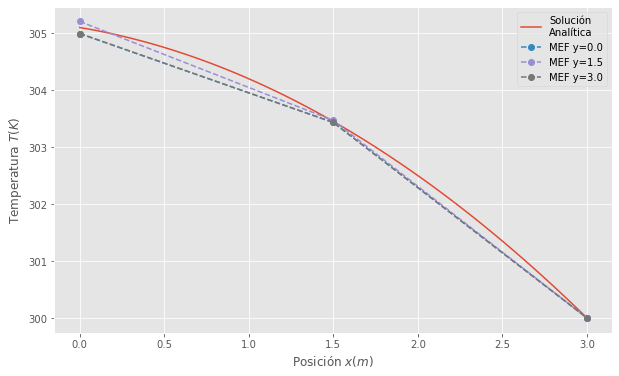

In [41]:
# Solución analítica
x = np.linspace(0,3,50)
T_analitica = 300 + 4*(3**2 - x**2)/(2*5) + (3 - x)/2

xx = np.array([0.0,L/2,L])

plt.figure(figsize=(10,6))
plt.plot(x,T_analitica,label='Solución\nAnalítica')
plt.plot(xx,T[0:3],'--o', label='MEF y=0.0')
plt.plot(xx,T[3:6],'--o', label='MEF y=1.5')
plt.plot(xx,T[6:],'--o', label='MEF y=3.0')
plt.xlabel('Posición $x (m)$')
plt.ylabel('Temperatura $T (K)$')
plt.legend()
plt.show()

## Conclusiones:

Sobre __SymPy__:

* Todos los símbolos deben ser declarados, habiendo una diferencia entre los símbolos y las variables que los contienen.
* Las operaciones matriciales, derivadas e integrales definidas se pueden hacer de forma fácil.
* Las funciones se pueden graficar de una manera sencilla.
* Es posible resolver sistemas de ecuaciones con relativa facilidad hasta cierto número de variables.
* Al substituir valores numéricos estas se pueden convertir automáticamente a __arrays__ de NumPy.

Sobre __NumPy__:

* Cuando no hay experiencia con el uso de __objetos__ los diccionarios pueden ser utilizados para organizar los elementos y trabajar con ellos de una manera automatizada.
* La función `sp.Matrix()` puede ser utilizada para una representación más amable de los NumPy array.
* Una vez implementado fácilmente se puede automatizar y escalar (a un gran número de elementos).

![162 elementos](Imagenes/162Elementos.png)